<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-luiscruzn/blob/main/Reduccion_dimensiones_A01002111.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ciencia y analítica de datos**

##**Actividad Semanal -- 5 Repaso Transformación y reducción de dimensiones**

###**Profra:** Dra. María de la Paz Rico Fernández.

###**Alumno:** Luis Salvador Cruz Nájera

###**Matrícula:** A01002111

###**Fecha:** 27 de octubre de 2022

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [14]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B=np.dot(np.dot(W,D),Winv)
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [18]:
#Matriz 1
A = array([[3 , 0, 2], [3, 0, -2], [0, 1, 1]])
# Obtenemos los eigenvalores y eigenvectores de la matriz A, los eigenvectores los asignamos a la variable W, posteriomente obtenemos la matriz identidad 
values, vectors = eig(A)
W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
# Procedemos a multplicar las matrices para poder reconstruir las mismas
print((np.round(np.dot(np.dot(W,D),Winv))).real)

[[ 3.  0.  2.]
 [ 3.  0. -2.]
 [ 0.  1.  1.]]


In [19]:
#Matriz 2
A2 = array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])
# Obtenemos los eigenvalores y eigenvectores de la matriz A, los eigenvectores los asignamos a la variable W, posteriomente obtenemos la matriz identidad 
values, vectors = eig(A2)
W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
# Procedemos a multplicar las matrices para poder reconstruir las mismas
print((np.round(np.dot(np.dot(W,D),Winv))).real)

[[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]


In [20]:
#Matriz 3
A3 = array([[5, 4, 0], [1, 0, 1], [10, 7, 1]])
# Obtenemos los eigenvalores y eigenvectores de la matriz A, los eigenvectores los asignamos a la variable W, posteriomente obtenemos la matriz identidad 
values, vectors = eig(A3)
W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
# Procedemos a multplicar las matrices para poder reconstruir las mismas
print((np.round(np.dot(np.dot(W,D),Winv))).real)

[[ 5.  4. -0.]
 [ 1. -0.  1.]
 [10.  7.  1.]]


#**Conclusión**

###*En este ejercicio comprendimos los conceptos de eigenvalor y eigenvector para una matriz e implicitamente para una transformación lineal también dado que al llevar a cabo la multiplicación de un vector/matriz con otra matriz, al vector original se le aplican escalamientos, reducciones o en este caso en una matriz identidad transformándolo en otro vector de distintas proporciones y dimensiones, es decir lleva a cabo un cambio desde un vector original hacia otro vector en otro espacio vectorial.*#

**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


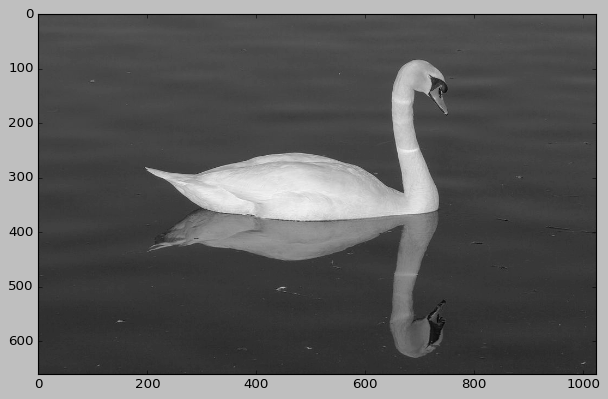

<PIL.Image.Image image mode=LA size=1024x660 at 0x7FCC3D9F9950>


In [21]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [22]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [23]:
U.shape

(660, 660)

In [24]:
V.shape

(1024, 1024)

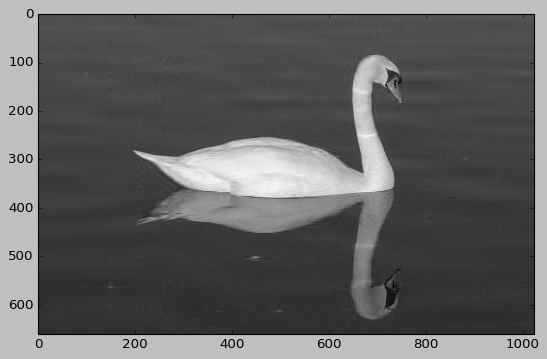

Felicidades la imagen está comprimida


In [9]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

#**SVD**

###El algoritmo SVD se basa en la Factorización de Matrices, que consiste en que cualquier matriz (n, d) se puede descomponer en un producto de tres factores.###

###El SVD ayuda a reducir los conjuntos de datos que contienen un gran número de valores. Además, este método también es útil para generar soluciones significativas para menos valores. Sin embargo, este menor número de valores también comprende la inmensa variabilidad disponible en los datos originales.###

[142. 142. 142. ... 102. 104. 103.]


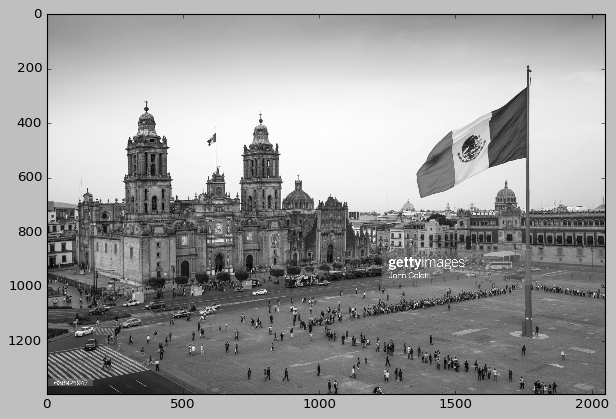

<PIL.Image.Image image mode=LA size=2048x1393 at 0x7FCC2A02D990>
(1393, 2048)
(1393, 1393)
(2048, 2048)


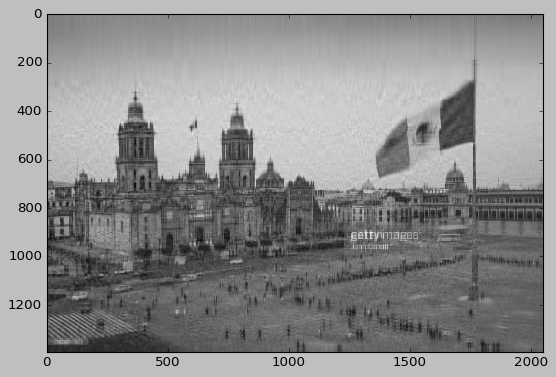

Felicidades la imagen está comprimida


In [50]:
#imagen 1

# Cargamos la imágen desde internet

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://media.gettyimages.com/photos/mexico-city-mexico-picture-id638921947?s=2048x2048')).convert('LA')

# Convertimos la imagen a escala de grises con el parámetro LA
imggray = img.convert('LA')

# Convertimos la imagen en una matriz
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

# Imprimimos la cantidad de pixeles que posee
imgmat.shape = (imggray.size[1],imggray.size[0])

# Imprimimos la imagen
plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

# Descomponemos el valor singular donde ...

# U: de tamaño (n, n) es una matriz ortogonal que contiene los vectores singulares izquierdos de A
# D: es una matriz diagonal (n,d) cuyos valores son los valores singulares de la matriz A ordenados en valor decreciente.
# V: es una matriz transpuesta (n,d) cuyos valores son los vectores singulares derechos de A.

U,D,V = np.linalg.svd(imgmat)
print(imgmat.shape)
print(U.shape)
print(V.shape)

# Procedemos a reconstruir la matriz con un valor de 50
nvalue = 50
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
# Imprimimos la imagen reconstruida
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[174. 174. 174. ...  43.  28.  37.]


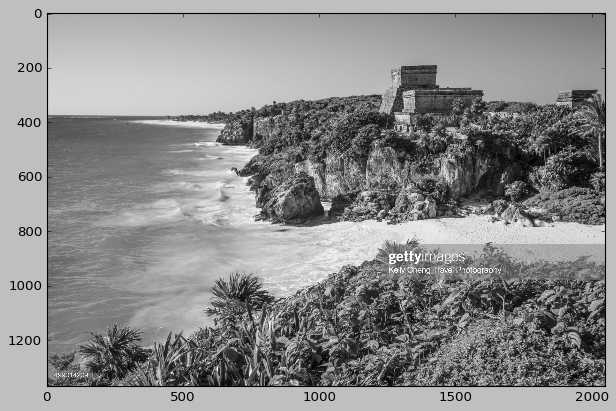

<PIL.Image.Image image mode=LA size=2048x1366 at 0x7FCC29F60650>
(1366, 2048)
(1366, 1366)
(2048, 2048)


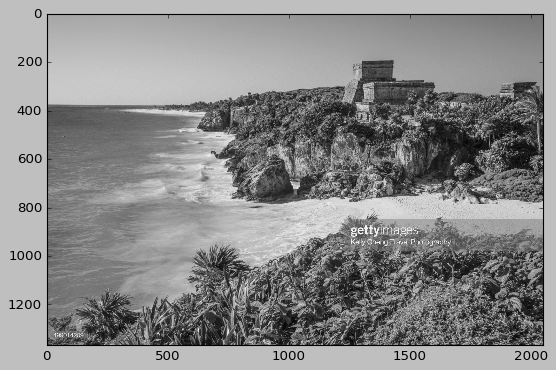

Felicidades la imagen está comprimida


In [48]:
#imagen 2

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://media.gettyimages.com/photos/tulum-mayan-ruins-picture-id499014209?s=2048x2048')).convert('LA')

# Convertimos la imagen a escala de grises con el parámetro LA
imggray = img.convert('LA')

# Convertimos la imagen en una matriz
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

# Imprimimos la cantidad de pixeles que posee
imgmat.shape = (imggray.size[1],imggray.size[0])

# Imprimimos la imagen
plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

# Descomponemos el valor singular donde ...

# U: de tamaño (n, n) es una matriz ortogonal que contiene los vectores singulares izquierdos de A
# D: es una matriz diagonal (n,d) cuyos valores son los valores singulares de la matriz A ordenados en valor decreciente.
# V: es una matriz transpuesta (n,d) cuyos valores son los vectores singulares derechos de A.

U,D,V = np.linalg.svd(imgmat)
print(imgmat.shape)
print(U.shape)
print(V.shape)

# Procedemos a reconstruir la matriz con un valor de 50
nvalue = 50
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
# Imprimimos la imagen reconstruida
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[ 97.  97.  97. ... 141. 174. 159.]


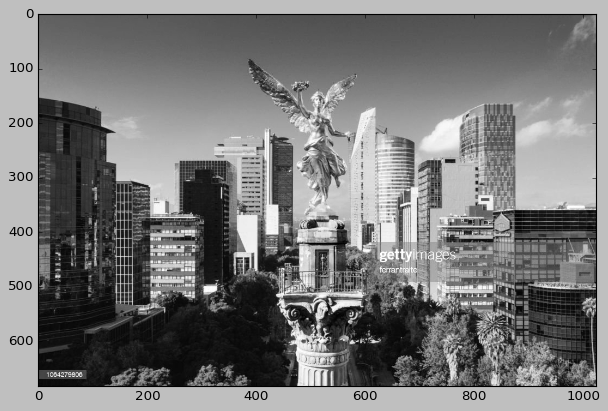

<PIL.Image.Image image mode=LA size=1024x682 at 0x7FCC29E61510>
(682, 1024)
(682, 682)
(1024, 1024)


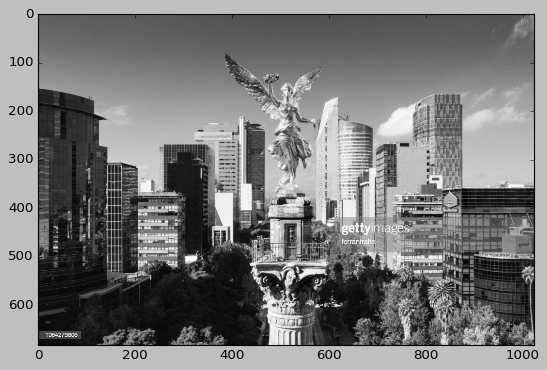

Felicidades la imagen está comprimida


In [49]:
#imagen 3

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://media.gettyimages.com/photos/independence-monument-mexico-city-picture-id1064279806')).convert('LA')

# Convertimos la imagen a escala de grises con el parámetro LA
imggray = img.convert('LA')

# Convertimos la imagen en una matriz
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

# Imprimimos la cantidad de pixeles que posee
imgmat.shape = (imggray.size[1],imggray.size[0])

# Imprimimos la imagen
plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

# Descomponemos el valor singular donde ...

# U: de tamaño (n, n) es una matriz ortogonal que contiene los vectores singulares izquierdos de A
# D: es una matriz diagonal (n,d) cuyos valores son los valores singulares de la matriz A ordenados en valor decreciente.
# V: es una matriz transpuesta (n,d) cuyos valores son los vectores singulares derechos de A.

U,D,V = np.linalg.svd(imgmat)
print(imgmat.shape)
print(U.shape)
print(V.shape)

# Procedemos a reconstruir la matriz con un valor de 50
nvalue = 50
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
# Imprimimos la imagen reconstruida
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

#**Conclusión**

###*El algoritmo de SVD se puede utilizar este para recuperar las variables atmosféricas según las mediciones de los satélites. También podemos utilizar esta técnica para interpolar mediciones dispersas o para un algoritmo de aprendizaje automático. Esta técnica ayuda a la regresión y clasificación del conjunto de datos, y por supuesto para comprensión de imágenes como en este caso*###

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




#**PCA**

El análisis de componentes principales (PCA) es una conocida técnica de reducción de dimensionalidad no supervisada que construye características/variables relevantes a través de combinaciones lineales (PCA lineal) o no lineales (PCA kernel) de las variables originales (características).

La construcción de características relevantes se logra mediante la transformación lineal de variables correlacionadas en un número menor de variables no correlacionadas. Esto se hace proyectando (producto escalar) los datos originales en el espacio PCA reducido utilizando los vectores propios de la matriz de covarianza/correlación, también conocida como componentes principales (PC).

Los datos proyectados resultantes son esencialmente combinaciones lineales de los datos originales que capturan la mayor parte de la variación en los mismos.

PCA es una transformación ortogonal de los datos en una serie de datos no correlacionados que viven en el espacio PCA reducido, de modo que el primer componente explica la mayor variación en los datos y cada componente posterior explica menos.

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

Las variables de entrada originales almacenadas en X tienen media cero y desviación estándar unitaria.

In [46]:
plt.style.use('ggplot')
# Cargamos el Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Estandarizamos las variable X
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# Aplicamos PCA con dos componentes
pca = PCA(n_components=2) 
# Proyectamos los datos en el espacio PCA
X_new = pca.fit_transform(X) 

Graficamos los datos antes y después de la transformación PCA y también codificamos con colores cada punto (muestra) usando la clase correspondiente de y.

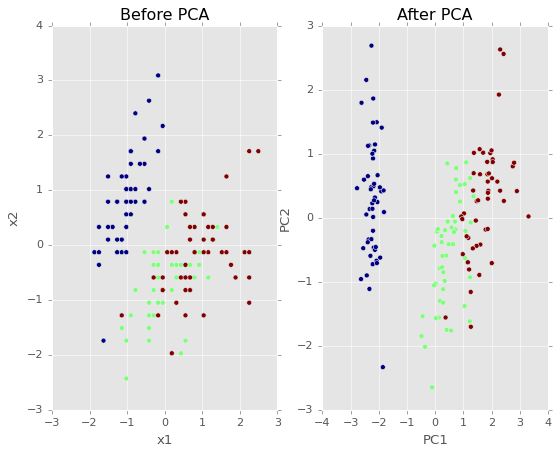

In [36]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

Podemos ver que en el espacio PCA, la varianza se maximiza a lo largo de del primer componente (explica el 73 % de la varianza) y segundo componente (explica el 22 % de la varianza). Juntos, explican el 95%.

In [37]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


La prueba de máxima varianza también se puede ver estimando la matriz de covarianza del espacio reducido:

In [38]:
np.cov(X_new.T)
array([[2.93808505e+00, 4.83198016e-16],
       [4.83198016e-16, 9.20164904e-01]])

array([[2.93808505e+00, 4.83198016e-16],
       [4.83198016e-16, 9.20164904e-01]])

Observamos que estos valores (en la diagonal tenemos las varianzas) son iguales a los eigenvalores de la covarianza almacenada en pca.explained_variance_:

In [39]:
pca.explained_variance_

array([2.93808505, 0.9201649 ])

La importancia de cada característica se refleja en la magnitud de los valores correspondientes en los eigenvectores (mayor magnitud, mayor importancia).

In [41]:
print(abs( pca.components_ ))

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


La importancia de cada característica se refleja en la magnitud de los valores correspondientes en los eigenvectores (mayor magnitud, mayor importancia).

Podemos concluir que las características 1, 3 y 4 son las más importantes para el PC1. De manera similar, podemos afirmar que la función 2 y luego la 1 son las más importantes para PC2.

In [42]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

Con la gráfica biplot podemos verificar visualmente que... 

a) la varianza está maximizada y

b) que las características 1, 3 y 4 son las más importantes para PC1. De manera similar, la característica 2 y luego la 1 son las más importantes para PC2.

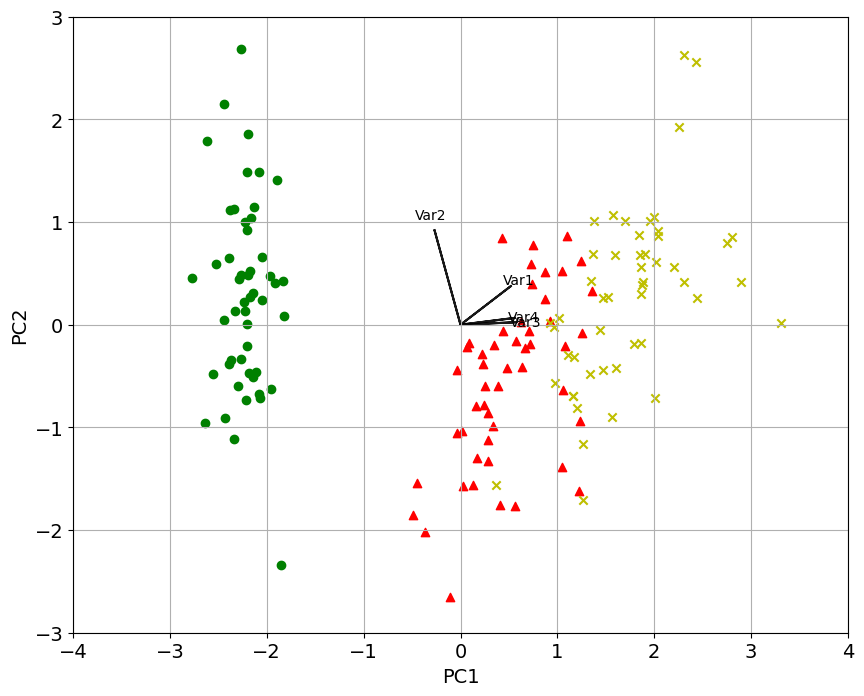

In [43]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

In [45]:
# Var 3 and Var 4 are extremely positively correlated
print(np.corrcoef(X[:,2], X[:,3])[1,0])
# Var 2and Var 3 are negatively correlated
print(np.corrcoef(X[:,1], X[:,2])[1,0])

0.9628654314027957
-0.42844010433054014


Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

#**Conclusión**

#**Conclusiones**

###*Las flechas (variables/características) que apuntan en la misma dirección indican correlación entre las variables que representan, mientras que las flechas que apuntan en direcciones opuestas indican un contraste entre las variables que representan, es decir una correlación negativa, como podemos comprobarlo con la función np.corrcoef*###

**Realiza un comentario relacionado a los pasos que se llevaron a cabo en este proceso de features importances.**

**¿Qué es feature importance y para que nos sirve?**

*La importancia de cada característica se refleja en la magnitud de los valores correspondientes en los eigenvectores (mayor magnitud, mayor importancia).*

*Además nos permite familiarizarnos con el conjunto de datos mediante la asignación de puntuaciones a las características en función de su utilidad en la construcción de cada componente principal.*

*Nos indica, que variables explican mejor los datos, lo cual como consencuencia, nos permite reducir dimensionalidad.*

**¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?**

*El hallazgo más importante durante el ejercicio fue ver de manera gráfica como se van generando los componente principales, esto debido a que de manera numérica es muy difícil percebir, pero este jercicio me permitió dar seguimiento a la generación de los mismos y cuales características son las que influyen más, adicional a que las características más parecidas las podemos reducir sin perder demasiada varianza*

**¿Dónde lo aplicarías o te sería de utilidad este conocimiento?**

*Inicialmente lo he utilizado solo para reducir dimensionalidades de modelos que necesito graficar, sin embargo, me ha permitido ampliar mi abánico de posibilidades como por ejemplo la compresión de datos*

*En mi trabajo, experimento con dataset que tienen características con alta colinealidad, lo que los hace buenos candidatos para poder aplicar PCA en ellos y poder reducir dimensionalidad con la finalidad de mejorar y optimizar el procesamiento computacional.